<a href="https://colab.research.google.com/github/guilhermelaviola/IMDbMovieListAnalysis/blob/main/IMDbWatchlistStudyFiltered.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from google.colab import drive
sns.set(style = 'darkgrid')
plt.style.use('seaborn-pastel')
drive.mount('/content/drive')

<ipython-input-1-921de9e8a408>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


Mounted at /content/drive


In [2]:
# Setting the search parameters:
filename = 'imdb.xlsx'
search_path = '/content/drive/My Drive/Datasets/Movies'
# Search for the file
file = None
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file= os.path.join(root, filename)
        break
    df = pd.read_excel(file)

# **Basic information of the dataset**

In [3]:
# Importing the dataset and displying the last 10 rows:
imdb = pd.ExcelFile(file)
wl = pd.read_excel(imdb, 'Watchlist')
wl.tail()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status
558,2022-04-08,Gone with the Wind,Movie,8.2,238.0,1939,"Drama, Romance, War",334371,1939-12-15 00:00:00,"Sam Wood, George Cukor, Victor Fleming",Not classified
559,2022-02-18,The Greatest Story Ever Told,Movie,6.6,260.0,1965,"Biography, Drama, History",11934,1965-02-15 00:00:00,"George Stevens, Jean Negulesco",To watch with mom
560,2020-11-26,Gettysburg,Movie,7.6,271.0,1993,"Drama, History, War",31310,1993-10-06 00:00:00,Ron Maxwell,To watch with mom
561,2022-09-15,Novecento,Movie,7.6,317.0,1976,"Drama, History",27289,1976-05-21 00:00:00,Bernardo Bertolucci,To watch with mom
562,2024-09-17,Alto Knights,Movie,NaN,NaN,2024,"Biography, Crime, Drama, History",0,2025-03-21 00:00:00,Barry Levinson,NaN


In [4]:
# Filtering the dataset by Status = 'To watch with mom':
to_watch_with_mom = wl[(wl['Status'] == 'To watch with mom')]

In [5]:
# Displaying the number of rows and columns in the filtered dataset:
to_watch_with_mom.shape

(256, 11)

In [6]:
# Displaying the datatypes of each column:
to_watch_with_mom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 256 entries, 1 to 561
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Created         256 non-null    datetime64[ns]
 1   Title           256 non-null    object        
 2   Title Type      256 non-null    object        
 3   IMDb Rating     256 non-null    float64       
 4   Runtime (mins)  256 non-null    float64       
 5   Year            256 non-null    int64         
 6   Genres          256 non-null    object        
 7   Num Votes       256 non-null    int64         
 8   Release Date    256 non-null    object        
 9   Directors       255 non-null    object        
 10  Status          256 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 24.0+ KB


In [7]:
# Displaying statistical data of the numerical data present in the filtered dataset:
to_watch_with_mom.describe()

,Created,IMDb Rating,Runtime (mins),Year,Num Votes
count,256,256.000000,256.000000,256.000000,2.560000e+02
mean,2022-12-10 01:58:07.500000,6.827734,122.371094,1987.523438,7.297356e+04
min,2020-04-29 00:00:00,0.000000,71.000000,1940.000000,0.000000e+00
25%,2022-02-27 18:00:00,6.300000,104.000000,1973.000000,6.042500e+03
50%,2022-11-03 12:00:00,6.900000,114.000000,1991.000000,2.059550e+04
75%,2023-10-30 06:00:00,7.300000,127.250000,2000.000000,6.240150e+04
max,2024-07-31 00:00:00,9.000000,317.000000,2024.000000,1.489711e+06
std,NaN,0.860445,31.321843,18.795896,1.598371e+05


# **Basic column data plotting**

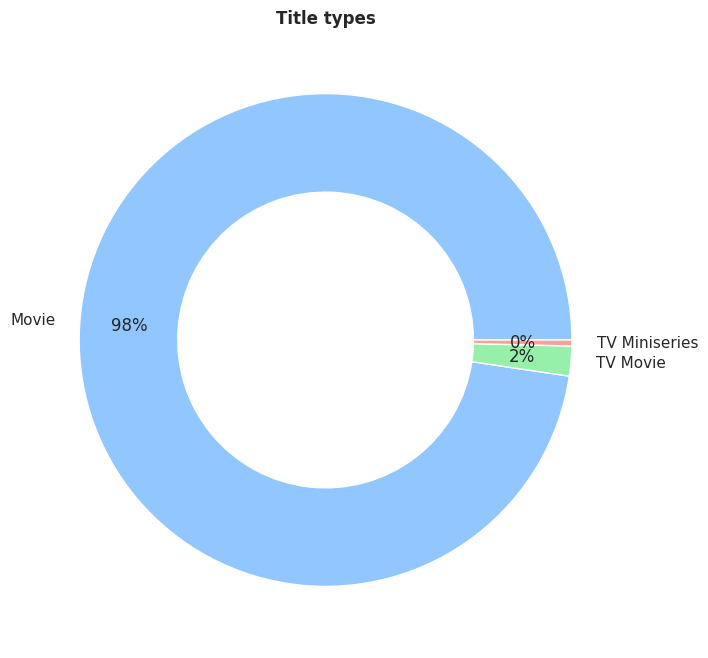

In [8]:
# Displaying the title types present in the filtered dataset:
to_watch_with_mom['Title Type'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Title types', fontweight = 'bold')
plt.show()

In [9]:
# Creating a datetime object based on the dates from the filtered dataset:
to_watch_with_mom['Created'] = to_watch_with_mom['Created'].map(pd.to_datetime)
to_watch_with_mom['Day Created'] = to_watch_with_mom['Created'].apply(lambda x : x.day)
to_watch_with_mom['Month Created'] = to_watch_with_mom['Created'].apply(lambda x : x.month)
to_watch_with_mom['Year Created'] = to_watch_with_mom['Created'].apply(lambda x : x.year)
to_watch_with_mom['Weekday Created'] = to_watch_with_mom['Created'].apply(lambda x : x.weekday())

# Displaying the datatypes of each column in the filtered dataset:
to_watch_with_mom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 256 entries, 1 to 561
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Created          256 non-null    datetime64[ns]
 1   Title            256 non-null    object        
 2   Title Type       256 non-null    object        
 3   IMDb Rating      256 non-null    float64       
 4   Runtime (mins)   256 non-null    float64       
 5   Year             256 non-null    int64         
 6   Genres           256 non-null    object        
 7   Num Votes        256 non-null    int64         
 8   Release Date     256 non-null    object        
 9   Directors        255 non-null    object        
 10  Status           256 non-null    object        
 11  Day Created      256 non-null    int64         
 12  Month Created    256 non-null    int64         
 13  Year Created     256 non-null    int64         
 14  Weekday Created  256 non-null    int64         

<ipython-input-9-624672dcd688>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Created'] = to_watch_with_mom['Created'].map(pd.to_datetime)
<ipython-input-9-624672dcd688>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Day Created'] = to_watch_with_mom['Created'].apply(lambda x : x.day)
<ipython-input-9-624672dcd688>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

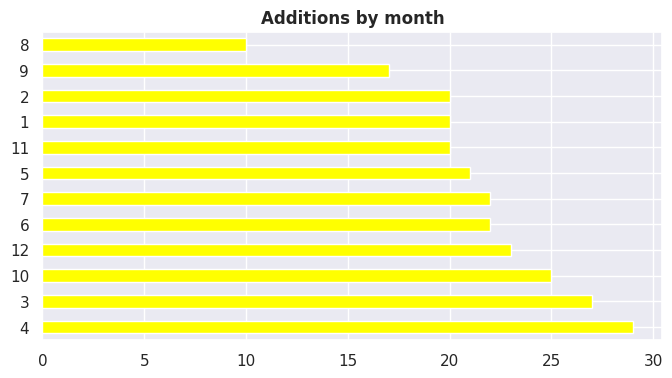

In [10]:
# Displaying the months with most and less additions:
to_watch_with_mom['Month Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 4))
plt.ylabel(None)
plt.title('Additions by month', fontweight = 'bold')
plt.show()

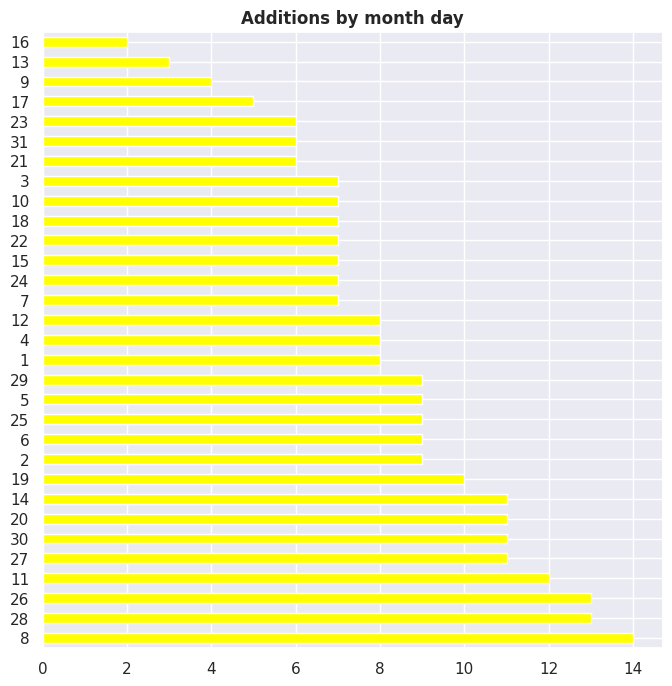

In [11]:
# Displaying the month days with most and less additions:
to_watch_with_mom['Day Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Additions by month day', fontweight = 'bold')
plt.show()

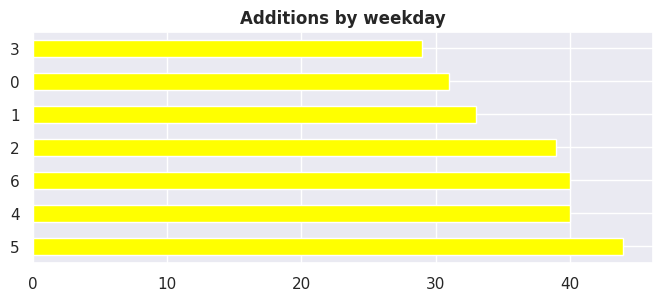

In [12]:
# Displaying the weekdays with most and less additions:
to_watch_with_mom['Weekday Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 3))
plt.ylabel(None)
plt.title('Additions by weekday', fontweight = 'bold')
plt.show()

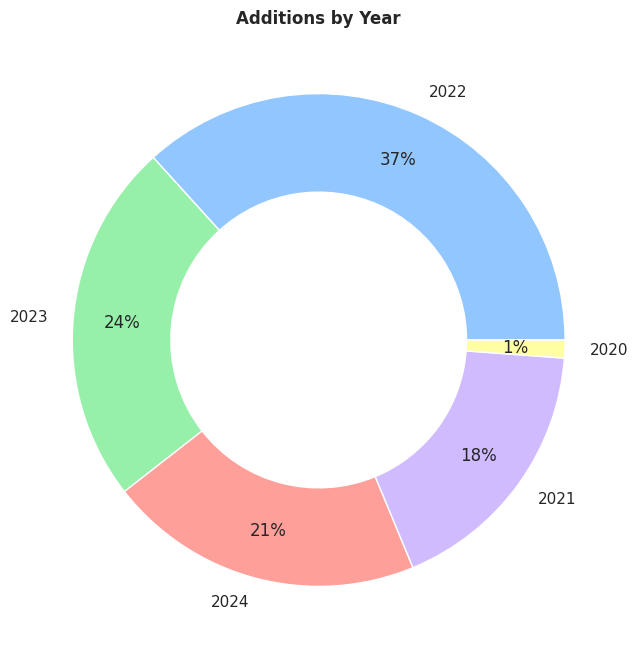

In [13]:
# Displaying the years with most and less additions:
to_watch_with_mom['Year Created'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Additions by Year', fontweight = 'bold')
plt.show()

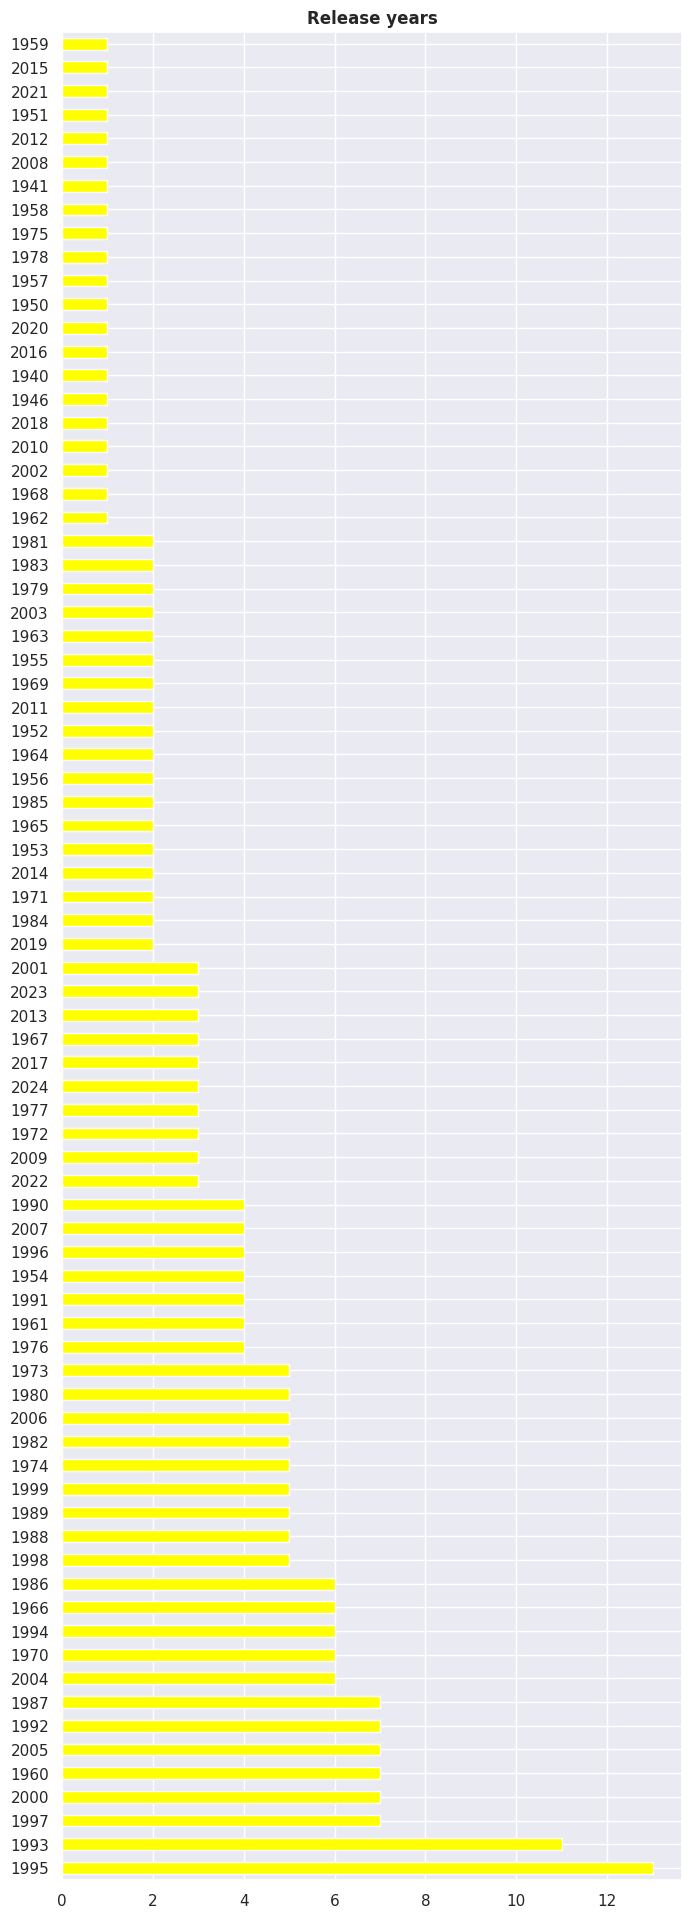

In [14]:
# Displaying distibution of release years in the dataset:
to_watch_with_mom['Year'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 24))
plt.ylabel(None)
plt.title('Release years', fontweight = 'bold')
plt.show()

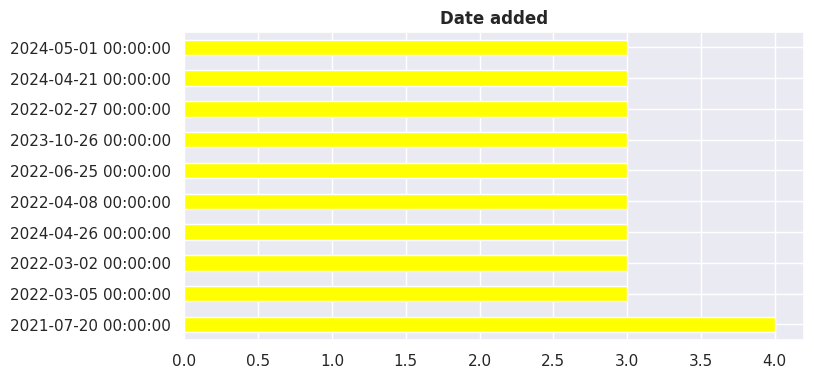

In [15]:
# Grouping by 'Date' and filtering groups with more than 2 entries only:
filtered_wl = to_watch_with_mom.groupby('Created').filter(lambda x: len(x) > 2)

# Displaying dates with most additions:
filtered_wl['Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 4))
plt.ylabel(None)
plt.title('Date added', fontweight = 'bold')
plt.show()

# **Applying functions to combine data from more than one column to generate new columns with analytics**

In [16]:
# Classifying the movies by decade they were release in:
def movies_by_decade(year):
  if year >= 1900 and year < 1910:
    result = '1900s'
  elif year >= 1910 and year < 1920:
    result = '1910s'
  elif year >= 1920 and year < 1930:
    result = '1920s'
  elif year >= 1930 and year < 1940:
    result = '1930s'
  elif year >= 1940 and year < 1950:
    result = '1940s'
  elif year >= 1950 and year < 1960:
    result = '1950s'
  elif year >= 1960 and year < 1970:
    result = '1960s'
  elif year >= 1970 and year < 1980:
    result = '1970s'
  elif year >= 1980 and year < 1990:
    result = '1980s'
  elif year >= 1990 and year < 2000:
    result = '1990s'
  elif year >= 2000 and year < 2010:
    result = '2000s'
  elif year >= 2010 and year < 2020:
    result = '2010s'
  elif year >= 2020 and year < 2030:
    result = '2020s'
  else:
    result = 'Unknown'
  return result

# Applying the function above on a column of the dataset and generating a new column as result:
to_watch_with_mom['Decade'] = to_watch_with_mom['Year'].apply(movies_by_decade)
to_watch_with_mom.head()

<ipython-input-16-33659bbd6e5a>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Decade'] = to_watch_with_mom['Year'].apply(movies_by_decade)


,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day Created,Month Created,Year Created,Weekday Created,Decade
1,2024-04-11,The Narrow Margin,Movie,7.6,71.0,1952,"Crime, Drama, Film-Noir, Thriller",8658,1952-04-23 00:00:00,"Richard Fleischer, William Cameron Menzies",To watch with mom,11,4,2024,3,1950s
4,2021-11-26,Roots,TV Miniseries,8.4,74.0,1977,"Biography, Drama, History, War",18885,1977-01-23 00:00:00,NaN,To watch with mom,26,11,2021,4,1970s
11,2024-06-14,The Incredible Journey,Movie,7.0,80.0,1963,"Adventure, Drama, Family",5257,1963-11-20 00:00:00,Fletcher Markle,To watch with mom,14,6,2024,4,1960s
15,2023-07-14,Ride in the Whirlwind,Movie,6.4,82.0,1966,"Drama, Western",4402,1966-09-14 00:00:00,Monte Hellman,To watch with mom,14,7,2023,4,1960s
18,2022-12-28,Osama,Movie,7.3,83.0,2003,Drama,9533,2003-05-20 00:00:00,Siddiq Barmak,To watch with mom,28,12,2022,2,2000s


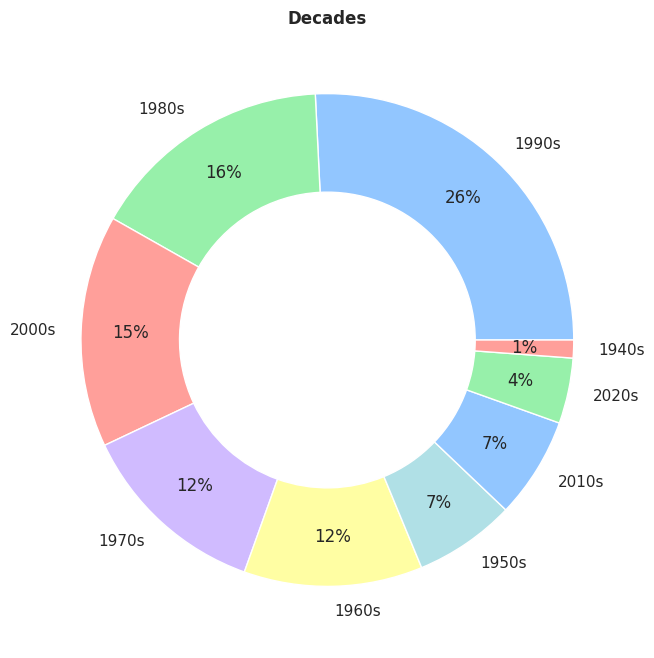

In [17]:
# Displaying the decades the movies are from:
to_watch_with_mom['Decade'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Decades', fontweight = 'bold')
plt.show()

In [18]:
# Classifying the movies by quality based on their rating:
def imdb_rating(rating):
  if rating >= 9:
    quality = 'Excellent'
  elif rating >= 8 and rating < 9:
    quality = 'Amazing'
  elif rating >= 7 and rating < 8:
    quality = 'Good'
  elif rating >= 6 and rating < 7:
    quality = 'Okay'
  elif rating >= 5 and rating < 6:
    quality = 'Regular'
  elif rating >= 4 and rating < 5:
    quality = 'Bad'
  else:
    quality = 'It sucks!'
  return quality

# Applying the function above on a column of the dataset and generating a new column as result:
to_watch_with_mom['Quality'] = to_watch_with_mom['IMDb Rating'].apply(imdb_rating)
to_watch_with_mom.head()

<ipython-input-18-c0a382964691>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Quality'] = to_watch_with_mom['IMDb Rating'].apply(imdb_rating)


,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality
1,2024-04-11,The Narrow Margin,Movie,7.6,71.0,1952,"Crime, Drama, Film-Noir, Thriller",8658,1952-04-23 00:00:00,"Richard Fleischer, William Cameron Menzies",To watch with mom,11,4,2024,3,1950s,Good
4,2021-11-26,Roots,TV Miniseries,8.4,74.0,1977,"Biography, Drama, History, War",18885,1977-01-23 00:00:00,NaN,To watch with mom,26,11,2021,4,1970s,Amazing
11,2024-06-14,The Incredible Journey,Movie,7.0,80.0,1963,"Adventure, Drama, Family",5257,1963-11-20 00:00:00,Fletcher Markle,To watch with mom,14,6,2024,4,1960s,Good
15,2023-07-14,Ride in the Whirlwind,Movie,6.4,82.0,1966,"Drama, Western",4402,1966-09-14 00:00:00,Monte Hellman,To watch with mom,14,7,2023,4,1960s,Okay
18,2022-12-28,Osama,Movie,7.3,83.0,2003,Drama,9533,2003-05-20 00:00:00,Siddiq Barmak,To watch with mom,28,12,2022,2,2000s,Good


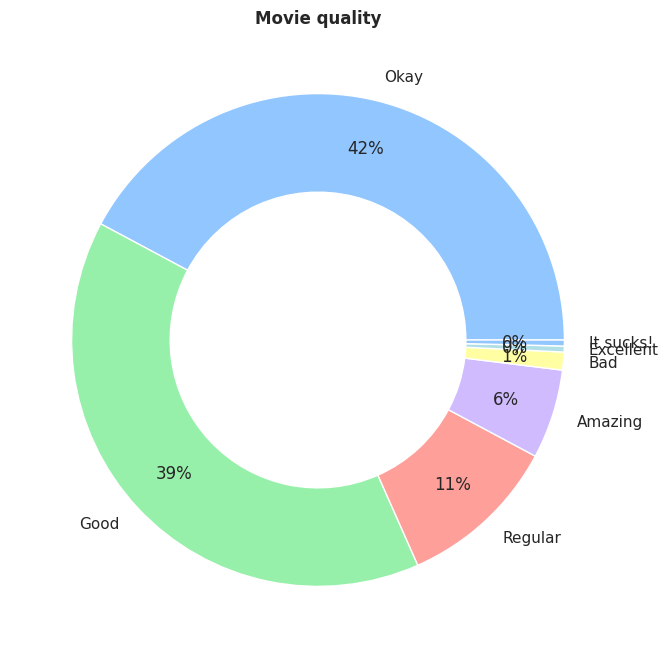

In [19]:
# Displaying the movie rating classification based on the algorithm above:
to_watch_with_mom['Quality'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie quality', fontweight = 'bold')
plt.show()

In [20]:
# Classifying the movies by popularity based on how many people rated them:
def movie_popularity(num_votes):
  if num_votes > 2000000:
    popularity = 'Over 2M votes'
  elif num_votes > 1000000 and num_votes <= 2000000:
    popularity = 'Over 1M votes'
  elif num_votes > 500000 and num_votes <= 1000000:
    popularity = 'Over 500k votes'
  elif num_votes > 250000 and num_votes <= 500000:
    popularity = 'Over 250k votes'
  else:
    popularity = 'Less than 250k votes'
  return popularity

# Applying the function above on a column of the dataset and generating a new column as result:
to_watch_with_mom['Movie popularity'] = to_watch_with_mom['Num Votes'].apply(movie_popularity)
to_watch_with_mom.head()

<ipython-input-20-cebfd6ec921e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Movie popularity'] = to_watch_with_mom['Num Votes'].apply(movie_popularity)


,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity
1,2024-04-11,The Narrow Margin,Movie,7.6,71.0,1952,"Crime, Drama, Film-Noir, Thriller",8658,1952-04-23 00:00:00,"Richard Fleischer, William Cameron Menzies",To watch with mom,11,4,2024,3,1950s,Good,Less than 250k votes
4,2021-11-26,Roots,TV Miniseries,8.4,74.0,1977,"Biography, Drama, History, War",18885,1977-01-23 00:00:00,NaN,To watch with mom,26,11,2021,4,1970s,Amazing,Less than 250k votes
11,2024-06-14,The Incredible Journey,Movie,7.0,80.0,1963,"Adventure, Drama, Family",5257,1963-11-20 00:00:00,Fletcher Markle,To watch with mom,14,6,2024,4,1960s,Good,Less than 250k votes
15,2023-07-14,Ride in the Whirlwind,Movie,6.4,82.0,1966,"Drama, Western",4402,1966-09-14 00:00:00,Monte Hellman,To watch with mom,14,7,2023,4,1960s,Okay,Less than 250k votes
18,2022-12-28,Osama,Movie,7.3,83.0,2003,Drama,9533,2003-05-20 00:00:00,Siddiq Barmak,To watch with mom,28,12,2022,2,2000s,Good,Less than 250k votes


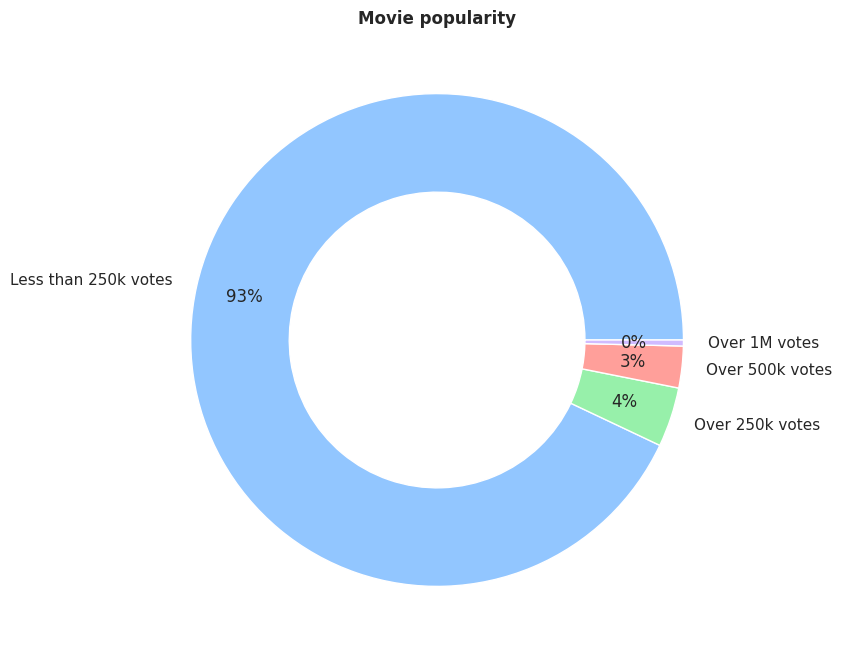

In [21]:
# Displaying the movie popularity based on the algorithm above:
to_watch_with_mom['Movie popularity'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie popularity', fontweight = 'bold')
plt.show()

In [22]:
# Classifying the movies by duration based on their runtime:
def movie_duration(runtime):
  if runtime >= 180:
    duration = 'Over 3h'
  elif runtime >= 150 and runtime < 180:
    duration = 'Between 2h30 and 2h59'
  elif runtime >= 120 and runtime < 150:
    duration = 'Between 2h and 2h29'
  elif runtime >= 100 and runtime < 120:
    duration = 'Between 1h40 and 1h59'
  elif runtime >= 90 and runtime < 100:
    duration = 'Between 1h30 and 1h39'
  elif runtime >= 70 and runtime < 90:
    duration = 'Between 1h10 and 1h29'
  else:
    duration = 'Shorter than 70 minutes'
  return duration

# Applying the function above on a column of the dataset and generating a new column as result:
to_watch_with_mom['Movie duration'] = to_watch_with_mom['Runtime (mins)'].apply(movie_duration)
to_watch_with_mom.head()

<ipython-input-22-5c4972d8f521>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Movie duration'] = to_watch_with_mom['Runtime (mins)'].apply(movie_duration)


,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity,Movie duration
1,2024-04-11,The Narrow Margin,Movie,7.6,71.0,1952,"Crime, Drama, Film-Noir, Thriller",8658,1952-04-23 00:00:00,"Richard Fleischer, William Cameron Menzies",To watch with mom,11,4,2024,3,1950s,Good,Less than 250k votes,Between 1h10 and 1h29
4,2021-11-26,Roots,TV Miniseries,8.4,74.0,1977,"Biography, Drama, History, War",18885,1977-01-23 00:00:00,NaN,To watch with mom,26,11,2021,4,1970s,Amazing,Less than 250k votes,Between 1h10 and 1h29
11,2024-06-14,The Incredible Journey,Movie,7.0,80.0,1963,"Adventure, Drama, Family",5257,1963-11-20 00:00:00,Fletcher Markle,To watch with mom,14,6,2024,4,1960s,Good,Less than 250k votes,Between 1h10 and 1h29
15,2023-07-14,Ride in the Whirlwind,Movie,6.4,82.0,1966,"Drama, Western",4402,1966-09-14 00:00:00,Monte Hellman,To watch with mom,14,7,2023,4,1960s,Okay,Less than 250k votes,Between 1h10 and 1h29
18,2022-12-28,Osama,Movie,7.3,83.0,2003,Drama,9533,2003-05-20 00:00:00,Siddiq Barmak,To watch with mom,28,12,2022,2,2000s,Good,Less than 250k votes,Between 1h10 and 1h29


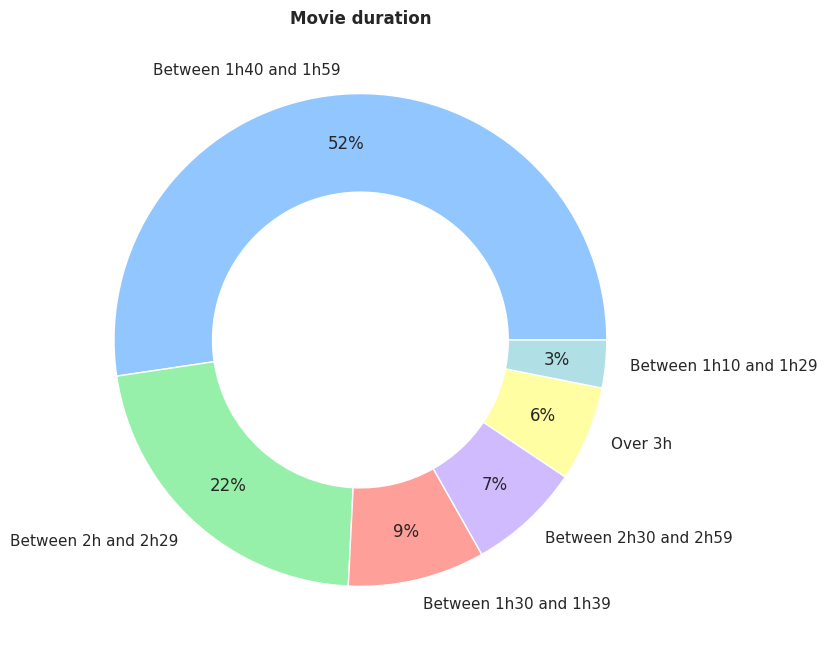

In [23]:
# Displaying the movie duration based on the algorithm above:
to_watch_with_mom['Movie duration'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie duration', fontweight = 'bold')
plt.show()

In [24]:
# Classifying the movies by year quartile added based on the month they were added to the dataset:
def year_quartile(month):
  if month >= 1 and month <= 3:
    quartile = 'First'
  elif month >= 4 and month <= 6:
    quartile = 'Second'
  elif month >= 7 and month <= 9:
    quartile = 'Third'
  else:
    quartile = 'Fourth'
  return quartile

# Applying the function above on a column of the dataset and generating a new column as result:
to_watch_with_mom['Quartile Added'] = to_watch_with_mom['Month Created'].apply(year_quartile)
to_watch_with_mom.head()

<ipython-input-24-a88387f4e083>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Quartile Added'] = to_watch_with_mom['Month Created'].apply(year_quartile)


,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity,Movie duration,Quartile Added
1,2024-04-11,The Narrow Margin,Movie,7.6,71.0,1952,"Crime, Drama, Film-Noir, Thriller",8658,1952-04-23 00:00:00,"Richard Fleischer, William Cameron Menzies",To watch with mom,11,4,2024,3,1950s,Good,Less than 250k votes,Between 1h10 and 1h29,Second
4,2021-11-26,Roots,TV Miniseries,8.4,74.0,1977,"Biography, Drama, History, War",18885,1977-01-23 00:00:00,NaN,To watch with mom,26,11,2021,4,1970s,Amazing,Less than 250k votes,Between 1h10 and 1h29,Fourth
11,2024-06-14,The Incredible Journey,Movie,7.0,80.0,1963,"Adventure, Drama, Family",5257,1963-11-20 00:00:00,Fletcher Markle,To watch with mom,14,6,2024,4,1960s,Good,Less than 250k votes,Between 1h10 and 1h29,Second
15,2023-07-14,Ride in the Whirlwind,Movie,6.4,82.0,1966,"Drama, Western",4402,1966-09-14 00:00:00,Monte Hellman,To watch with mom,14,7,2023,4,1960s,Okay,Less than 250k votes,Between 1h10 and 1h29,Third
18,2022-12-28,Osama,Movie,7.3,83.0,2003,Drama,9533,2003-05-20 00:00:00,Siddiq Barmak,To watch with mom,28,12,2022,2,2000s,Good,Less than 250k votes,Between 1h10 and 1h29,Fourth


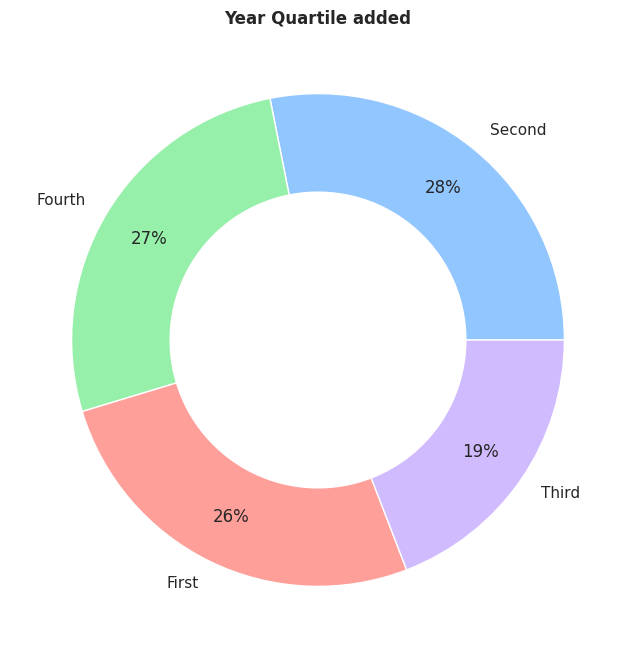

In [25]:
# Displaying the quartile the movie was added based on the algorithm above:
to_watch_with_mom['Quartile Added'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Year Quartile added', fontweight = 'bold')
plt.show()

In [26]:
# Classifying the movies by the month half added based on the day they were added to the dataset:
def month_half(day):
  if day >= 1 and day <= 15:
    half = 'First'
  else:
    half = 'Second'
  return half

# Applying the function above on a column of the dataset and generating a new column as result:
to_watch_with_mom['Month Half Added'] = to_watch_with_mom['Day Created'].apply(month_half)
to_watch_with_mom.head()

<ipython-input-26-a7e4e0574ba8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Month Half Added'] = to_watch_with_mom['Day Created'].apply(month_half)


,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,...,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity,Movie duration,Quartile Added,Month Half Added
1,2024-04-11,The Narrow Margin,Movie,7.6,71.0,1952,"Crime, Drama, Film-Noir, Thriller",8658,1952-04-23 00:00:00,"Richard Fleischer, William Cameron Menzies",...,11,4,2024,3,1950s,Good,Less than 250k votes,Between 1h10 and 1h29,Second,First
4,2021-11-26,Roots,TV Miniseries,8.4,74.0,1977,"Biography, Drama, History, War",18885,1977-01-23 00:00:00,NaN,...,26,11,2021,4,1970s,Amazing,Less than 250k votes,Between 1h10 and 1h29,Fourth,Second
11,2024-06-14,The Incredible Journey,Movie,7.0,80.0,1963,"Adventure, Drama, Family",5257,1963-11-20 00:00:00,Fletcher Markle,...,14,6,2024,4,1960s,Good,Less than 250k votes,Between 1h10 and 1h29,Second,First
15,2023-07-14,Ride in the Whirlwind,Movie,6.4,82.0,1966,"Drama, Western",4402,1966-09-14 00:00:00,Monte Hellman,...,14,7,2023,4,1960s,Okay,Less than 250k votes,Between 1h10 and 1h29,Third,First
18,2022-12-28,Osama,Movie,7.3,83.0,2003,Drama,9533,2003-05-20 00:00:00,Siddiq Barmak,...,28,12,2022,2,2000s,Good,Less than 250k votes,Between 1h10 and 1h29,Fourth,Second


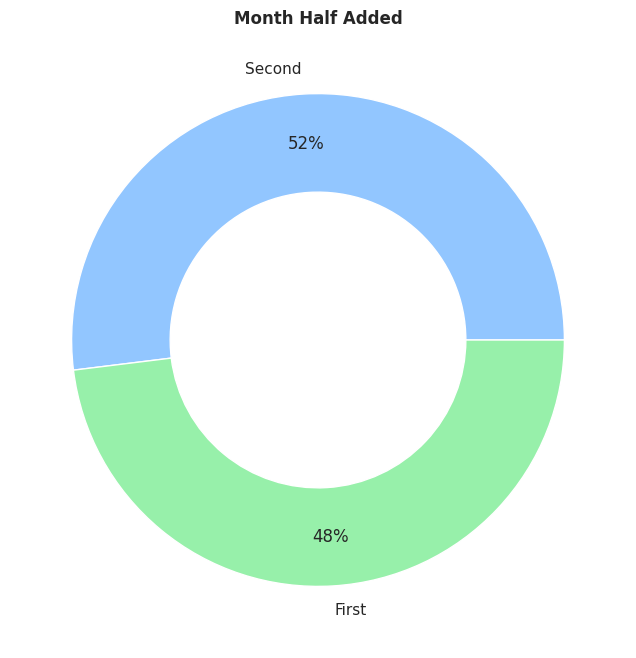

In [27]:
# Displaying the month half the movie was added based on the algorithm above:
to_watch_with_mom['Month Half Added'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Month Half Added', fontweight = 'bold')
plt.show()

# **The algorithm below was a bit more complicated to be implemented, as the movie genres are listed in the column separated by comma, so they had to be splitted and counted, and then their proportions were counted and plotted.**

In [28]:
# Creating a list of genres:
genre_list = pd.DataFrame({'Genres' : [
              'Action','Animation', 'Biography',
              'Comedy', 'Crime', 'Drama',
              'Documentary', 'Family', 'Fantasy',
              'Film-Noir', 'History', 'Horror',
              'Mystery', 'Music', 'Musical',
              'Romance', 'Sci-Fi', 'Sport',
              'Thriller', 'War', 'Western']})

# Splitting the genres by comma and removing leading spaces:
to_watch_with_mom['Genres'] = to_watch_with_mom['Genres'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
to_watch_with_mom = to_watch_with_mom.explode('Genres')

# Counting Matrix using crosstab method:
genre_counts = pd.crosstab(index = to_watch_with_mom.index, columns = to_watch_with_mom['Genres'], margins = False).to_dict('index')
genre_counts = pd.DataFrame(genre_counts)

# Counting the number of 0s and 1s in each row:
counts = (genre_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

<ipython-input-28-7f07c1d7911d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Genres'] = to_watch_with_mom['Genres'].str.split(',').apply(lambda x : [i.strip() for i in x])


In [29]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
counts = pd.DataFrame(counts.tolist(), index = counts.index, columns = ['False', 'True'])
print(counts)

             False  True
Action         214    42
Adventure      214    42
Animation      255     1
Biography      218    38
Comedy         211    45
Crime          204    52
Documentary    255     1
Drama           37   219
Family         238    18
Fantasy        243    13
Film-Noir      253     3
History        229    27
Horror         247     9
Music          245    11
Musical        255     1
Mystery        245    11
Romance        198    58
Sci-Fi         239    17
Sport          236    20
Thriller       202    54
War            219    37
Western        239    17


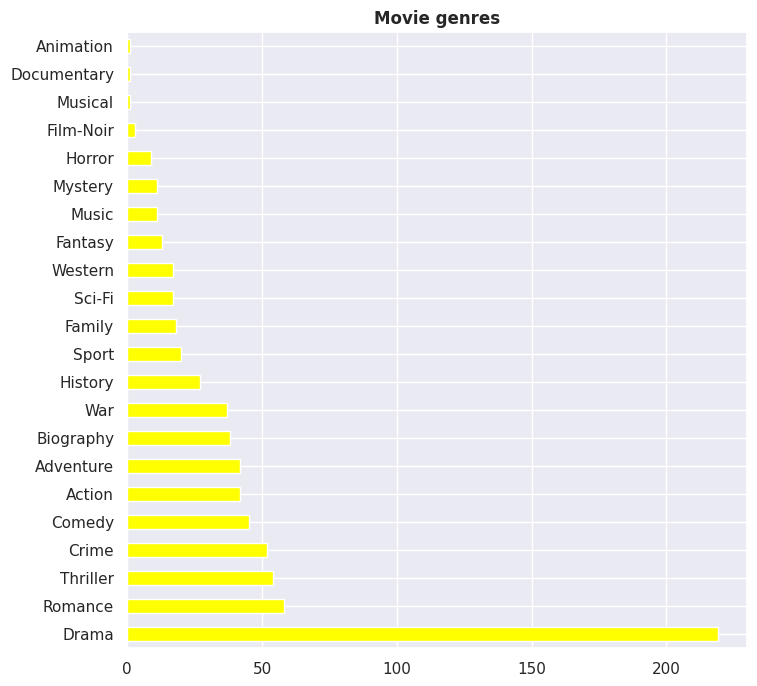

In [30]:
# Displaying the proportions of the movie genres present in the dataset:
counts['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Movie genres', fontweight = 'bold')
plt.show()

In [31]:
to_watch_with_mom = to_watch_with_mom[to_watch_with_mom['Directors'].apply(lambda x: isinstance(x, str))]

# Splitting the directors by comma and removing leading spaces:
to_watch_with_mom['Directors'] = to_watch_with_mom['Directors'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
to_watch_with_mom = to_watch_with_mom.explode('Directors')

# Counting Matrix using crosstab method:
directors_counts = pd.crosstab(index = to_watch_with_mom.index, columns = to_watch_with_mom['Directors'], margins = False).to_dict('index')
directors_counts = pd.DataFrame(directors_counts)

# Counting the number of 0s and 1s in each row:
final_directors_counts = (directors_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

<ipython-input-31-08fa5ebcc414>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Directors'] = to_watch_with_mom['Directors'].str.split(',').apply(lambda x : [i.strip() for i in x])


In [32]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
final_directors_counts = pd.DataFrame(final_directors_counts.tolist(), index = final_directors_counts.index, columns = ['False', 'True'])
print(final_directors_counts)

                      False  True
Adrian Lyne             253     0
Alejandro Monteverde    254     0
Alex Segal              254     0
Alfred Hitchcock        253     0
Andrew Erwin            254     0
...                     ...   ...
William Dear            254     0
William Friedkin        254     0
William Wyler           254     0
Wolfgang Petersen       254     0
Zoltan Korda            254     1

[230 rows x 2 columns]


In [33]:
# Grouping by 'Date' and filtering groups with more than 2 entries only:
# Displaying dates with most additions:
dir = final_directors_counts['True'].filter(lambda x: len(x) > 2)
dir['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'yellow', figsize = (8, 16))
plt.ylabel(None)
plt.title('Movie directors', fontweight = 'bold')
plt.show()

TypeError: Index(...) must be called with a collection of some kind, <function <lambda> at 0x7dfd0c4149d0> was passed